# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats
import datetime

#current date for graphs
Current_Date_Formatted = datetime.datetime.today().strftime ('%m/%d/%Y')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [4]:
time.sleep(1)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
for city in cities:
    print(f"Processing Record {cities.index(city)} of Set 1 | {city}.")
    
time.sleep(1)

Processing Record 0 of Set 1 | kargil.
Processing Record 1 of Set 1 | havelock.
Processing Record 2 of Set 1 | kulachi.
Processing Record 3 of Set 1 | gurgan.
Processing Record 4 of Set 1 | bathsheba.
Processing Record 5 of Set 1 | vaini.
Processing Record 6 of Set 1 | ushuaia.
Processing Record 7 of Set 1 | thompson.
Processing Record 8 of Set 1 | taolanaro.
Processing Record 9 of Set 1 | karratha.
Processing Record 10 of Set 1 | siddapur.
Processing Record 11 of Set 1 | marabba.
Processing Record 12 of Set 1 | adrar.
Processing Record 13 of Set 1 | dikson.
Processing Record 14 of Set 1 | beruni.
Processing Record 15 of Set 1 | leningradskiy.
Processing Record 16 of Set 1 | busselton.
Processing Record 17 of Set 1 | san jeronimo.
Processing Record 18 of Set 1 | mataura.
Processing Record 19 of Set 1 | burnie.
Processing Record 20 of Set 1 | manono.
Processing Record 21 of Set 1 | khatanga.
Processing Record 22 of Set 1 | bambous virieux.
Processing Record 23 of Set 1 | arman.
Processi

In [6]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for citi in cities:
    
    try:
        response = requests.get(query_url + citi).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #print(json.dumps(response, indent=2))
        
    except KeyError:
        
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)

time.sleep(1)

## Convert Raw Data to DataFrame
* Save as csv

In [7]:
#create a df of the variables
weather_dict = {
   "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kargil,34.57,76.10,41.09,52.0,0.0,3.00,IN,1.603251e+09
1,havelock,34.88,-76.90,69.01,94.0,1.0,4.61,US,1.603251e+09
2,kulachi,31.93,70.46,77.23,17.0,0.0,0.87,PK,1.603251e+09
3,gurgan,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,bathsheba,13.22,-59.52,80.60,83.0,40.0,6.93,BB,1.603251e+09


In [8]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

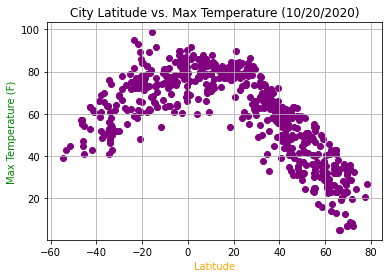

In [9]:
#lat vs temp scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Temperature Plot.png')
plt.show()

In [10]:
#Code and plot above is running through the Max Temp and comparing it to latitudes of the cities found.

### Latitude vs. Humidity Plot

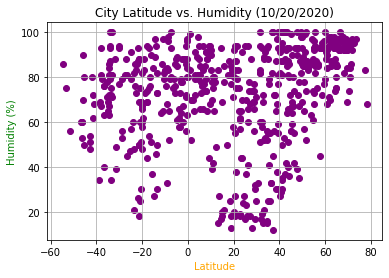

In [11]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Humidity Plot.png')
plt.show()

In [12]:
#Code and plot above is running through the Humidity and comparing it to latitudes of the cities found.

### Latitude vs. Cloudiness Plot

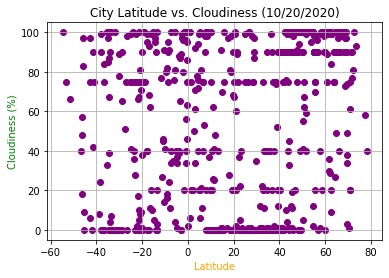

In [13]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Cloudiness Plot.png')
plt.show()

In [14]:
#Code and plot above is running through the Cloudiness and comparing it to latitudes of the cities found.

### Latitude vs. Wind Speed Plot

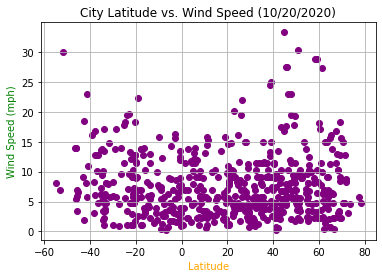

In [15]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed" + " (" + str(Current_Date_Formatted) + ")")
plt.grid()
plt.savefig('Latitude vs. Wind Speed Plot.png')
plt.show()

In [16]:
#Code and plot above is running through the Wind Speed and comparing it to latitudes of the cities found.

## Linear Regression

### Write linear regression plot function (optional)

In [17]:
# Perform a linear regression on temperature vs. latitude
x_values = weather_data['Lat'].dropna()
y_values = weather_data['Max Temp'].dropna()

# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = -0.34x + 66.76


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7922256443088863


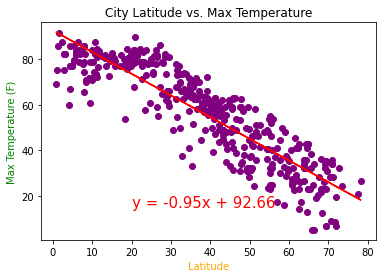

In [18]:
# Add the linear regression equation and line to plot
#x_values = weather_data['Lat']
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Max Temp'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Max Temp'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4605705403570076


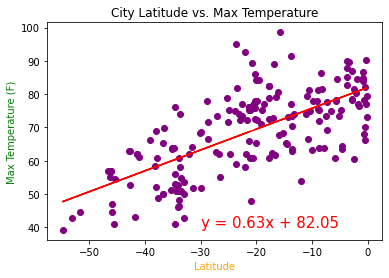

In [19]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Max Temp'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Max Temp'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

# Show plot
plt.show()

In [20]:
#Codes and plots above is running through the Max Temp and comparing it to latitudes of the cities found for both the
#Northern and Southern Hemispheres.There is a positive correlation to Max Temp as you get closer to the equator. 

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10275096431113036


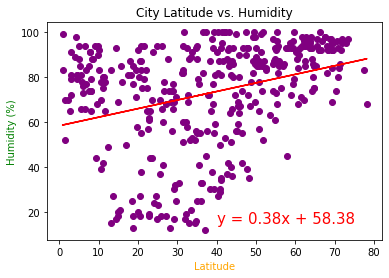

In [21]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Humidity'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Humidity'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.019878178596072736


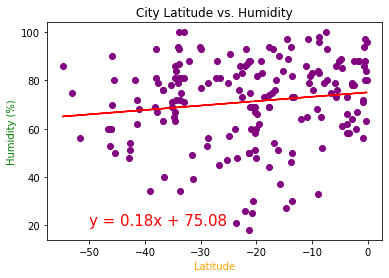

In [22]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Humidity'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Humidity'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

In [23]:
#Codes and plots above is running through the Humidity and comparing it to latitudes of the cities found for both the
#Northern and Southern Hemispheres. There is a slightly positive but not significant correlation between Humidity and city latitude. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1015292328327559


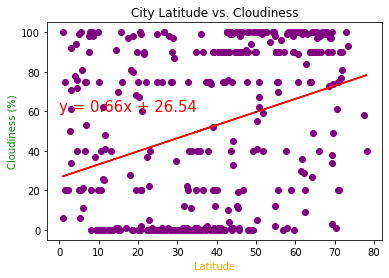

In [24]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Cloudiness'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Cloudiness'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013350930800955505


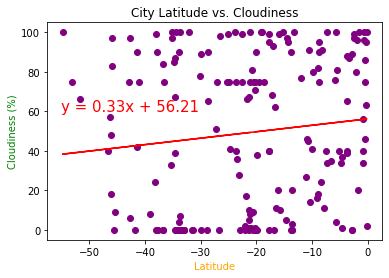

In [25]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Cloudiness'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Cloudiness'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

In [26]:
#Codes and plots above is running through the Cloudiness and comparing it to latitudes of the cities found for both the
#Northern and Southern Hemispheres. There is a slightly positive correlation between city latitude and wind speed. 

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007395545637357481


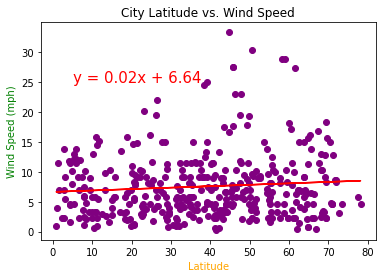

In [27]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Wind Speed'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Wind Speed'].loc[weather_data['Lat'] >= 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5, 25),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06689031120191179


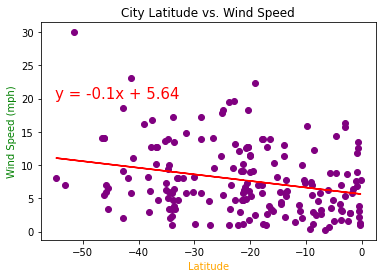

In [28]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat'].loc[weather_data['Lat'] < 0]
y_values = weather_data['Wind Speed'].loc[weather_data['Lat'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] < 0], weather_data['Wind Speed'].loc[weather_data['Lat'] < 0], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

In [29]:
#Codes and plots above is running through the Wind Speed and comparing it to latitudes of the cities found for both the
#Northern and Southern Hemispheres. There is no correlation between city latitude and wind speed. 